# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# autoreload modules when code is run
%reload_ext autoreload
%autoreload 2

# local modules
import inauguralproject

import gade #Dette skal vel slettes, når vi er helt i mål

# Question 1

BRIEFLY EXPLAIN HOW YOU SOLVE THE MODEL.

In [2]:
# code for solving the model (remember documentation and comments)

# The model is solve by the functions in the class named ConsumerProblem.
# For a solution given the parameters we simply assign the class and print the optimizer functions third output, "result"

solution = gade.ConsumerProblem()

print(solution.optimizer()[3])
print(solution.para())

Labour is: 0.3196, Consumption is: 1.1199 and utility is: 0.0968
m: 1, v: 10, eps: 0.3, tau0: 0.4, tau1: 0.1, kappa: 0.4 and w: 0.5


# Question 2

ADD ANSWER.

<function matplotlib.pyplot.show(*args, **kw)>

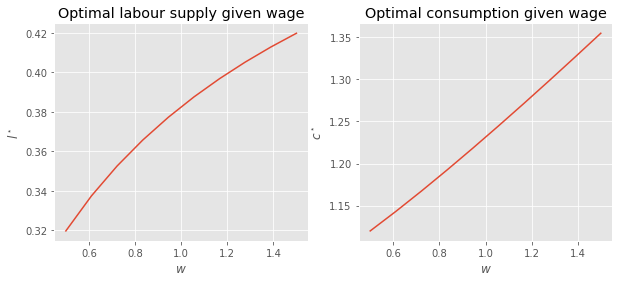

In [3]:
# code
plt.style.use('ggplot')

density = 10

w_vec = np.linspace(0.5, 1.5, num=density) #establishing a uniform distributed wage variable 
l_opt = np.empty(density) #Creating empty tuple of range 10, to contain the optimal labour hours
c_opt = np.empty(density) #creating empty tuple of range 10, to contain the optimal consumption

for i in range(0,len(w_vec)): # Looping over the wage vector to find optimal solutions for each random wage between 0.5 and 1.5
    solution.w = w_vec[i]
    l_opt[i] = solution.optimizer()[0]
    c_opt[i] = solution.optimizer()[1]
   
#Creating the figure:    
fig = plt.figure(figsize=(10,4))

# Left plot showing optimal labour supply
ax_left = fig.add_subplot(1,2,1)

ax_left.plot(w_vec,l_opt)

ax_left.set_title('Optimal labour supply given wage')
ax_left.set_xlabel('$w$')
ax_left.set_ylabel('$l^\star$')
ax_left.grid(True)

# Right plot showing optimal consumption
ax_right = fig.add_subplot(1,2,2)

ax_right.plot(w_vec,c_opt)

ax_right.set_title('Optimal consumption given wage')
ax_right.set_xlabel('$w$')
ax_right.set_ylabel('$c^\star$')
ax_right.grid(True)

plt.show   

# Question 3 & 4

ADD ANSWER.

In [8]:
# code
solution = gade.ConsumerProblem() # Resets the parameters to default
print('The tax revenue is: ' + str(solution.tax())) # Print tax revenue for epsilon = 0.3 (Default)
solution.eps = 0.1 # change epsilon inside the class parameters
print('The tax revenue when epsilon is changed to 0.1 is: ' + str(solution.tax())) # Print tax revenue for epsilon = 0.1

The tax revenue is: 1357.2575102638798
The tax revenue when epsilon is changed to 0.1 is: 3330.2374948773104


# Question 5

In [9]:
# code (made with loop)

ops = gade.ConsumerProblem() # Optimal Parameter Settings 


# Define the optimal parameter settings and the given tax
# We start by setting everything to zero and update them trough the 3-fold loop
kappa_star = 0
tau0_star = 0
tau1_star = 0
Tax_star=0

# Define the accuracy of the parameters

A = 0.1
end = 1+A

#The loop
for h in np.arange(0,end,A):
    ops.kappa = h
    for j in np.arange(0,end,A):
        ops.tau_1 = j
        for i in np.arange(0,end,A):
            ops.tau_0=i
            
            tax_rev = ops.tax(N=10) # For convenience we set Population = 10

            if tax_rev > Tax_star:
                Tax_star = tax_rev
                kappa_star = h
                tau1_star = j
                tau0_star = i



print('Kappa should be: ' + str(kappa_star))
print('Tau0 should be: ' + str(tau0_star))
print('Tau1 should be: ' + str(tau1_star))
print('Tax Revenue would then be ' + str(Tax_star))


Kappa should be: 0.0
Tau0 should be: 0.0
Tau1 should be: 0.8
Tax Revenue would then be 2.855578371473454


# Conclusion

ADD CONCISE CONLUSION.